# Exploratory Data Analysis

**Objective:** Understanding the data and find the pattern and trends about the data

**Data Set Information**
The data used is from a Portuguese secondary school. The data includes academic and personal(Economic factors) characteristics of the students as well as final grades. The task is to predict the final grade from the student information. (Regression)
[Link to dataset](https://archive.ics.uci.edu/ml/datasets/student+performance)


**Citation:**
P. Cortez and A. Silva. Using Data Mining to Predict Secondary School Student Performance. In A. Brito and J. Teixeira Eds., Proceedings of 5th FUture BUsiness TEChnology Conference (FUBUTEC 2008) pp. 5-12, Porto, Portugal, April, 2008, EUROSIS, ISBN 978-9077381-39-7.[Web Link](http://www3.dsi.uminho.pt/pcortez/student.pdf)

# Import Libraries

In [4]:
# Importing required libraries.
import pandas as pd # Importing pandas
import numpy as np # Importing numpy
import seaborn as sns #Importing Seaborn for data visualisation
import matplotlib.pyplot as plt #Importing matplotlib for data visualisation
%matplotlib inline 
sns.set(color_codes=True)

# The Data 
The data is added to 2 data frames studentMath and Student Port

In [5]:
# Function to fetch the data set
# @path : path of the data file
def fetchDataSet(path):
    dataSet =""
    try:
        dataSet = pd.read_csv(path,sep=';')
    except FileNotFoundError:
        print("The file is not found!!. Please add a valid file in the given path.")
    return dataSet  

In [6]:
studentMath = fetchDataSet('DataFile/student-mat.csv')#StudentMath contains the data of student data on Mathematics
studentPort = fetchDataSet('DataFile/student-por.csv')#StudentPort contains the data of student data on Portuguese 

Checking the size and columns of the 2 datasets

In [7]:
def dasetInfo(name,dataset):
        print("Checking the shapes of the {} data set :".format(name),dataset.shape)
        print("Columns\n",dataset.columns)

In [8]:
dasetInfo("Maths",studentMath)

Checking the shapes of the Maths data set : (395, 33)
Columns
 Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')


In [9]:
dasetInfo("Portuguese",studentPort)

Checking the shapes of the Portuguese data set : (649, 33)
Columns
 Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')


# Observations
Maths dataset have 395 observations while Portuguese dataset have 649 observations.
Both data sets have same 33 columns.

Final data set is created by concantenating the data sets. Also,the duplicate entries are removing using the similiar attributes.

In [10]:
# Merging the given datasets and removing the duplicates based on the similiar attributes
# @dataSets : the datasets to concantanate
# @sim-attr : Similiar attributes to find duplicates
def mergeDataSets(dataSets,sim_attr):
    data = pd.concat(dataSets)
    finalDataSet = data.drop_duplicates(subset=sim_attr, keep ='first').reset_index(drop=True)#keep = first keeps the values of first joined dataset
    return finalDataSet
studentDataSet = mergeDataSets([studentMath, studentPort],['school','sex','age','address','famsize','Pstatus','Medu','Fedu','Mjob','Fjob','reason','nursery','internet'])

In [11]:
def geDataSet():
    return studentDataSet

In [12]:
# Checking the details of the dataset
print('The shape of the dataset is :', studentDataSet.shape,'\nThe dataset description\n')
studentDataSet.info()

The shape of the dataset is : (662, 33) 
The dataset description

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 662 entries, 0 to 661
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      662 non-null    object
 1   sex         662 non-null    object
 2   age         662 non-null    int64 
 3   address     662 non-null    object
 4   famsize     662 non-null    object
 5   Pstatus     662 non-null    object
 6   Medu        662 non-null    int64 
 7   Fedu        662 non-null    int64 
 8   Mjob        662 non-null    object
 9   Fjob        662 non-null    object
 10  reason      662 non-null    object
 11  guardian    662 non-null    object
 12  traveltime  662 non-null    int64 
 13  studytime   662 non-null    int64 
 14  failures    662 non-null    int64 
 15  schoolsup   662 non-null    object
 16  famsup      662 non-null    object
 17  paid        662 non-null    object
 18  activities  662 non-null

We got the final dataset with 662 observations by removing 382 duplicate entries.
Data has categorical and integer values.

Checking the null values 

In [13]:
studentDataSet.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

Data has categorical and integer values. There is no need of data cleansing since the dataset does not have any missing/null values.

In [13]:
# Checking 5 rows of the datasets 
studentDataSet.head()#default 5 rows

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


# Summary statistics
We have calculated the statistics functions of all numerical values and created a statistics table
The categorical variables relations and interpretations have described using plots

In [14]:
# Importing library for skew and kurtosis
from scipy.stats import skew
from scipy.stats import kurtosis

class SummaryStatistics():#SummaryStatistics inherits StatisticsClass Class
    def __init__(self, data_frame):
        self.__dataframe = data_frame
    def getMean(self):
        return np.array(round(np.mean(self.__dataframe),4))
    def getStd(self):
        return np.array(round(np.std(self.__dataframe),4))
    def getMinimum(self):
        return np.array(round(np.min(self.__dataframe),4))
    def getLowerQuadrile(self):
        return np.array(np.percentile(self.__dataframe,25, axis=0))
    def getMedian(self):
        return np.array(np.percentile(self.__dataframe,50, axis=0))
    def getUpperQuadrile(self):
        return np.array(np.percentile(self.__dataframe,75, axis=0))
    def getMaximum(self):
        return np.array(round(np.max(self.__dataframe),4))
    def getKurtosis(self,bias=False,fisher=True,axis=0):
        #calculate sample kurtosis
        return kurtosis(self.__dataframe,axis,fisher, bias)
    def getSkew(self,bias=False,axis=0):
        return skew(self.__dataframe,axis, bias)
    def getStatistics(self):
        finalmatrix= np.concatenate([self.getMean(),self.getStd(),self.getMinimum(),self.getLowerQuadrile(),self.getMedian(),self.getUpperQuadrile(),self.getMaximum(),self.getSkew(),self.getKurtosis()], axis=0)
        statValues = ['Mean','Std','Minimum','First quartile','Median','Third quartile','Maximum','Skew','Kurtosis']
        Variables = ['Age','Mother education','Father education','Travel time','Study time','Failures','Family relation','Free time','Go out','Daily alcohol','Weekly alcohol','health','absences','G1','G2','G3']
        df2 = pd.DataFrame(data= finalmatrix.reshape(9,16), index=statValues,columns=Variables)
        return df2.transpose()

In [15]:
def statistics():
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    selectVariables = studentDataSet.select_dtypes(include=numerics)
    stat = SummaryStatistics(selectVariables)
    global stat_table #Declared globally to use outside to see as a dataframe
    stat_table = stat.getStatistics()
statistics() # Calling the main function

In [16]:
stat_table

,Mean,Std,Minimum,First quartile,Median,Third quartile,Maximum,Skew,Kurtosis
Age,16.8127,1.2682,15.0,16.0,17.0,18.0,22.0,0.422084,-0.031293
Mother education,2.4924,1.1301,0.0,2.0,2.0,4.0,4.0,-0.006391,-1.254753
Father education,2.2931,1.0932,0.0,1.0,2.0,3.0,4.0,0.233855,-1.088070
Travel time,1.5650,0.7422,1.0,1.0,1.0,2.0,4.0,1.253308,1.164596
Study time,1.9275,0.8268,1.0,1.0,2.0,2.0,4.0,0.698354,0.039527
Failures,0.3323,0.7155,0.0,0.0,0.0,0.0,3.0,2.363761,5.113053
Family relation,3.9381,0.9412,1.0,4.0,4.0,5.0,5.0,-1.107387,1.416695
Free time,3.1843,1.0598,1.0,3.0,3.0,4.0,5.0,-0.189793,-0.431887
Go out,3.1722,1.1610,1.0,2.0,3.0,4.0,5.0,-0.002315,-0.833895
Daily alcohol,1.5045,0.9259,1.0,1.0,1.0,2.0,5.0,2.121290,4.231877


In [17]:
# Checking the count of observations based on the school
studentDataSet['school'].value_counts()

GP    434
MS    228
Name: school, dtype: int64

In [18]:
# Checking the average G3 value based on the sex
studentDataSet.groupby('sex')['G3'].mean()

sex
F    10.628205
M    10.863971
Name: G3, dtype: float64

In [19]:
# The no. of unique items present in the categorical column
studentDataSet.select_dtypes('object').nunique()

school        2
sex           2
address       2
famsize       2
Pstatus       2
Mjob          5
Fjob          5
reason        4
guardian      3
schoolsup     2
famsup        2
paid          2
activities    2
nursery       2
higher        2
internet      2
romantic      2
dtype: int64

Description of the dataset

There are 662 of data entries with only two distinct schools.
The percentage of female to male is 58% and 42% respectively
The average age of a student is 17 years with 15 years minimum and 22 years maximum.
A student may averagely,absent hiself/herself 4 days from school.
The total number of features are 34 including the added subject while 16 is integer type and 18 string type

# Data Visualization

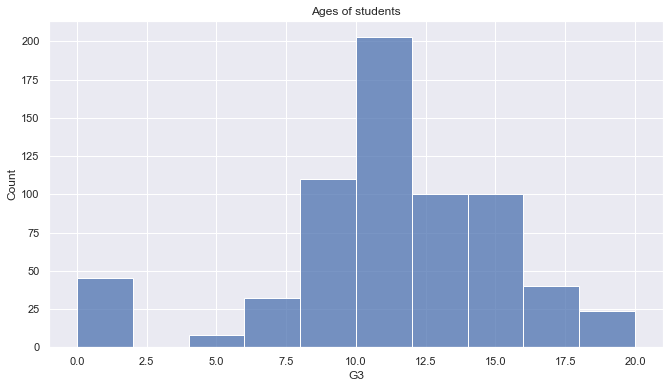

In [20]:
plt.figure(figsize=(11,6))
plt.title('Ages of students')
sns.histplot(studentDataSet['G3'], color='b', bins=10)
plt.show()

In [21]:
f_stud,m_stud = studentDataSet['sex'].value_counts()    # Number of female & male students
print('Number of female students:',f_stud)
print('Number of male students:',m_stud)

Number of female students: 390
Number of male students: 272


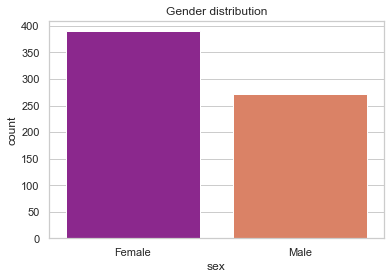

In [22]:
sns.set_style('whitegrid')    # male & female student representaion on countplot
b= sns.countplot(x='sex',data=studentDataSet,palette='plasma')
b.axes.set_title('Gender distribution')
x_labels = ['Female','Male']
b.set_xticklabels(x_labels)
plt.show()

The number of females are higher than the male students

# Students' Age

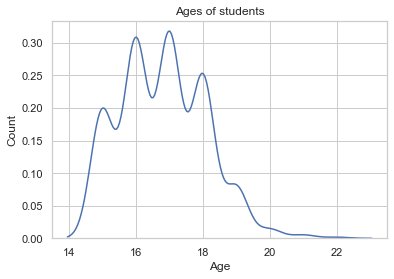

In [23]:
b = sns.kdeplot(studentDataSet['age'])    # Kernel Density Estimations
b.axes.set_title('Ages of students')
b.set_xlabel('Age')
b.set_ylabel('Count')
plt.show()

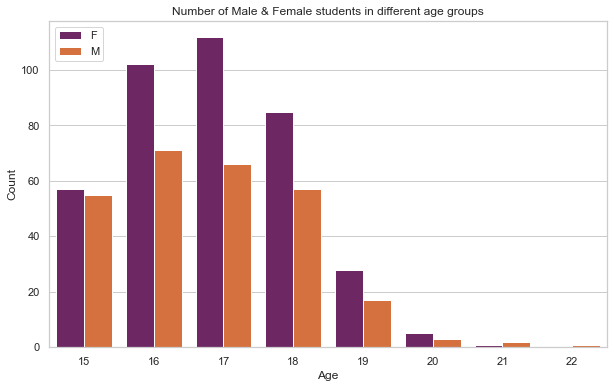

In [24]:
plt.figure(figsize=(10,6))
b = sns.countplot(x='age',hue='sex', data=studentDataSet, palette='inferno')
b.axes.set_title('Number of Male & Female students in different age groups')
plt.legend(loc='best')
b.set_xlabel("Age")
b.set_ylabel("Count")
plt.show()

The student age seems to be ranging from 15-19, where gender distribution is pretty even in each age group.
The age group above 19 may be outliers, year back students or droupouts.

# Students from Urban & Rural Areas

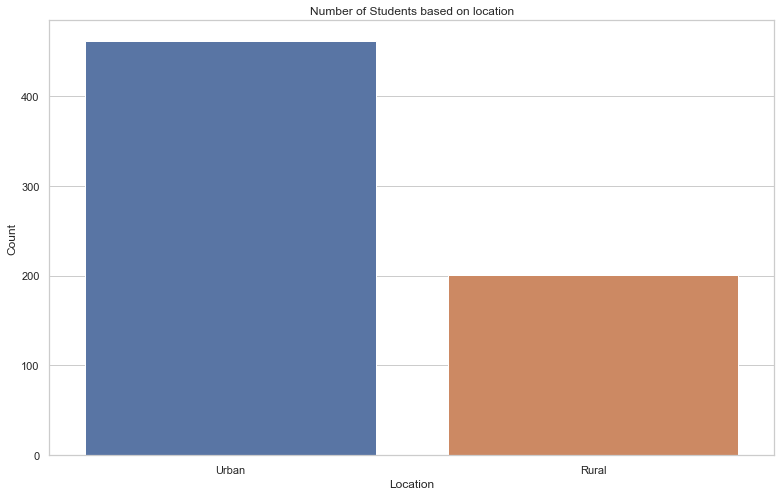

In [25]:
plt.figure(figsize=(13,8))
b = sns.countplot(x='address', data=studentDataSet)
b.axes.set_title('Number of Students based on location')
x_labels = ['Urban','Rural']
b.set_xlabel("Location")
b.set_ylabel("Count")
b.set_xticklabels(x_labels)
plt.show()

Approximately 70% students come from urban region and 30% from rural region.

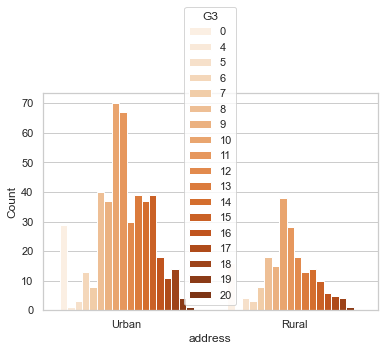

In [26]:
b.x_labels = ['Urban','Rural']
b=sns.countplot(x='address',hue='G3',data=studentDataSet,palette='Oranges')
b.set_ylabel("Count")
b.set_xticklabels(x_labels)
plt.show()

# Checking the dependencies of socio-economic factors

1. Does age affects the score?

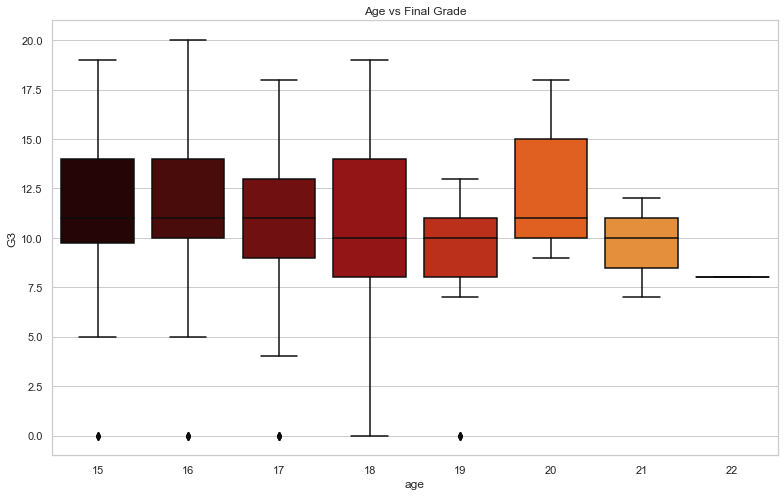

In [27]:
plt.figure(figsize=(13,8))
b= sns.boxplot(x='age', y='G3',data=studentDataSet,palette='gist_heat')
b.axes.set_title('Age vs Final Grade')
plt.show()

The above plot shows that the median grades of the three age groups(15,16,17) are similar. 
Also, 19 and 21 have the same median and also very small spread compared to others.
The age group 15,16,17,19 have outliers of score 0 wither may be due to absence or very low scored students with 0 marks.
Age group 20 seems to score highest grades among all.

2. Do urban students perform better than rural students?

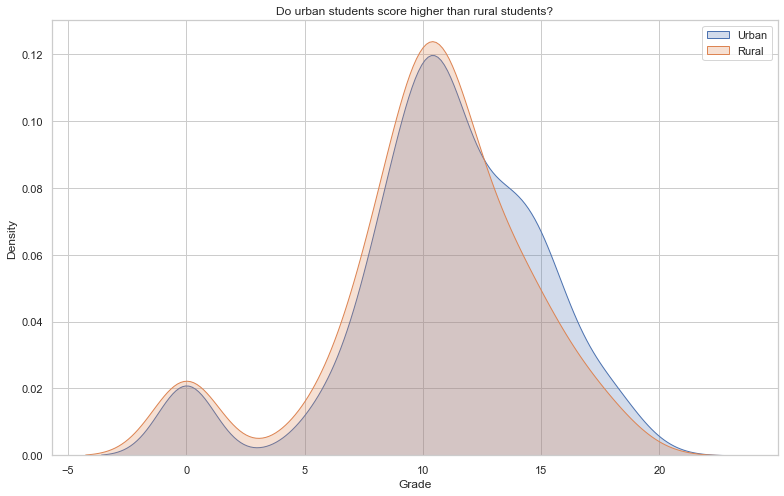

In [28]:
# Grade distribution by address
plt.figure(figsize=(13,8))
sns.kdeplot(studentDataSet.loc[studentDataSet['address'] == 'U', 'G3'], label='Urban', shade = True)
sns.kdeplot(studentDataSet.loc[studentDataSet['address'] == 'R', 'G3'], label='Rural', shade = True)
plt.title('Do urban students score higher than rural students?')
plt.legend(loc='best')
plt.xlabel('Grade');
plt.ylabel('Density')
plt.show()

From the above graph we can understand that there is not much difference between the grades based on location.

3. Do the past failures have high corelation on the final grade  G3?

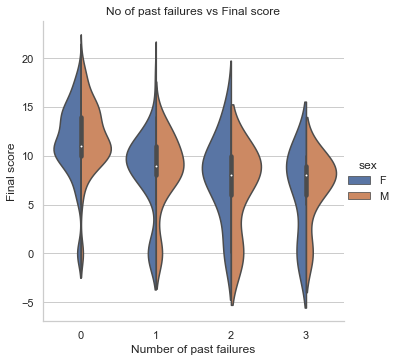

In [29]:
# Grade distribution by address
sns.catplot(x="failures", y="G3", hue="sex",
            kind="violin", split=True, data=studentDataSet)
plt.title('No of past failures vs Final score')
plt.xlabel('Number of past failures');
plt.ylabel('Final score')
plt.show()

Number of past failures have significant effects on student final grade. The students which have 0 failures made high scores than other students

# Family Attributes

# Parent's job

In [30]:
# Define Boxplot function, to plot all three exam scores for different variables, check median and quartiles of the scores.
# plt.figure(figsize=(16,10))
# plt.show()
def boxpl(dt, x_cols, y_cols,title='Title'):
    n = 1
    x_cnt = len(x_cols)
    y_cnt = len(y_cols)
    figure = plt.figure(figsize=(17, 5 * x_cnt))
    figure.suptitle(title, fontsize=20)
    for x_ax in x_cols:
        for i in y_cols:
            ax = figure.add_subplot(x_cnt, y_cnt, n)
            #ax.set_title(i)
            g = sns.boxplot(x = dt[x_ax], y = dt[i])
            g.set_xticklabels(g.get_xticklabels(), rotation=20)
            n = n + 1         

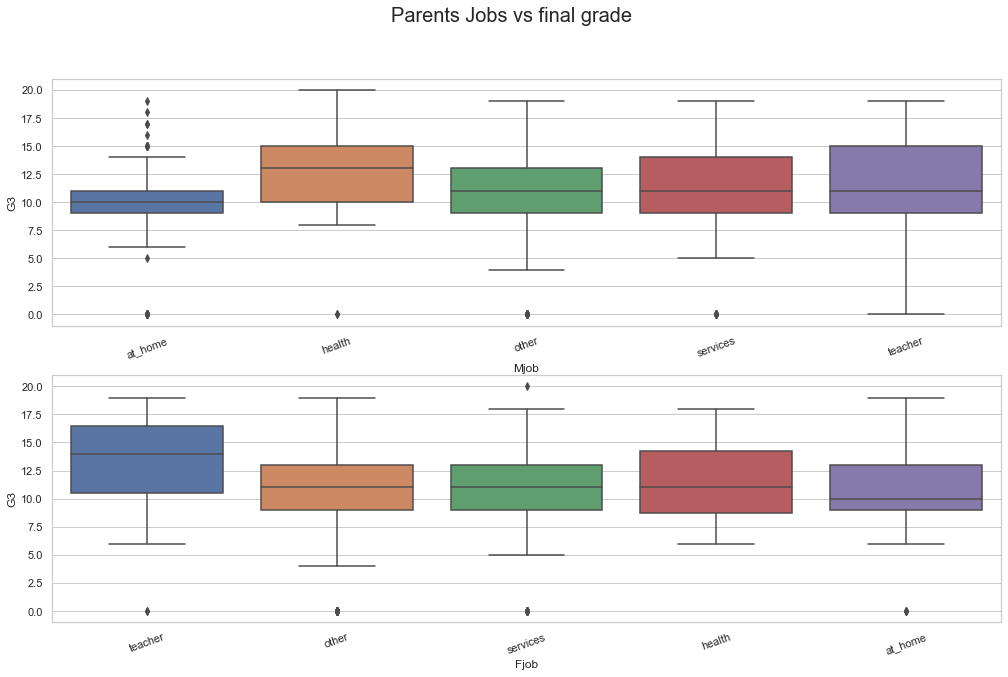

In [31]:
y_cols = ['G3']
x_cols = ['Mjob', 'Fjob']
boxpl(studentDataSet, x_cols, y_cols,'Parents Jobs vs final grade')
plt.show()

From this plot, we can understand that parents job have impact on students score. The students with mother/ father as teachers or in health sector scores more marks.
The students with other/at home have achieved low marks compared to others.

# Parent's Education

In [32]:
#The chart styled using ggplot
from matplotlib import style
def subBoxplot(title,x_value,x1_value,y_value,label1,label2,x_order):
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))
        fig.suptitle(title, fontsize=30)
        sns.boxplot(x=x_value, y=y_value, data=studentDataSet, ax=ax1)
        ax1.title.set_text(label1)
        #Checking with father's education
        var1 = ax1.set_xticklabels(x_order, rotation=30)
        sns.boxplot(x=x1_value, y=y_value, data=studentDataSet, ax=ax2)
        ax2.title.set_text(label2)
        var2 = ax2.set_xticklabels(x_order, rotation=30)

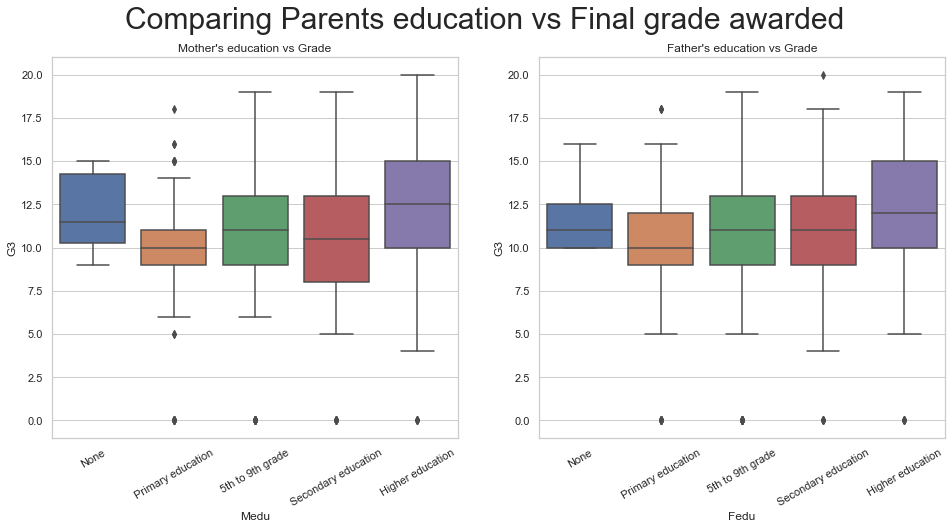

In [33]:
subBoxplot('Comparing Parents education vs Final grade awarded','Medu','Fedu','G3', 
           'Mother\'s education vs Grade','Father\'s education vs Grade',
           ('None', 'Primary education', '5th to 9th grade', 'Secondary education',"Higher education"))  

Students with high educated parents score more than other students.
But there are some students who scores well even though there parents have no education.

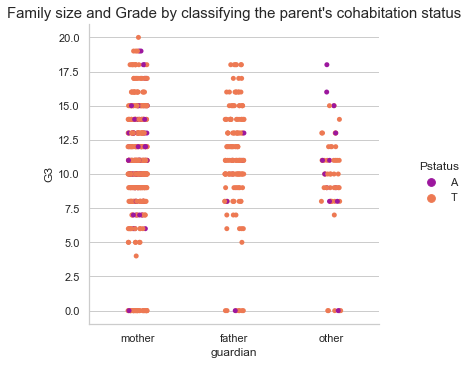

In [34]:
b = sns.catplot(x="guardian", y="G3", data=studentDataSet, hue='Pstatus',palette='plasma')
plt.title('Family size and Grade by classifying the parent\'s cohabitation status', fontdict={'fontname':'arial', 'fontsize':15})
plt.show()

The students who lives with their mother are achieving more scores than others even though the parents are apart.
But the students who lives with father achieving more scores but from this plot, we can understand that both parents are living together.
In the case of students lives with others does not affects much about the parents cohabitation status

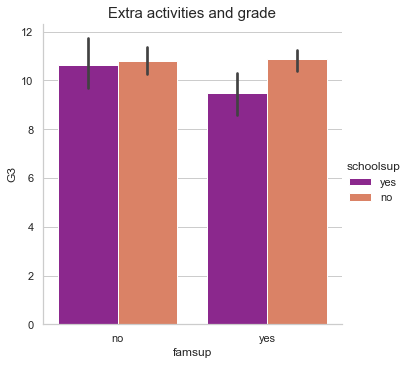

In [35]:
sns.catplot(x='famsup',y='G3',data=studentDataSet,kind="bar",hue='schoolsup',palette='plasma')
plt.title('Extra activities and grade', fontdict={'fontname':'arial', 'fontsize':15})
plt.show()

Students getting both family support and school support became more lazy and score low scores than the students without any support.

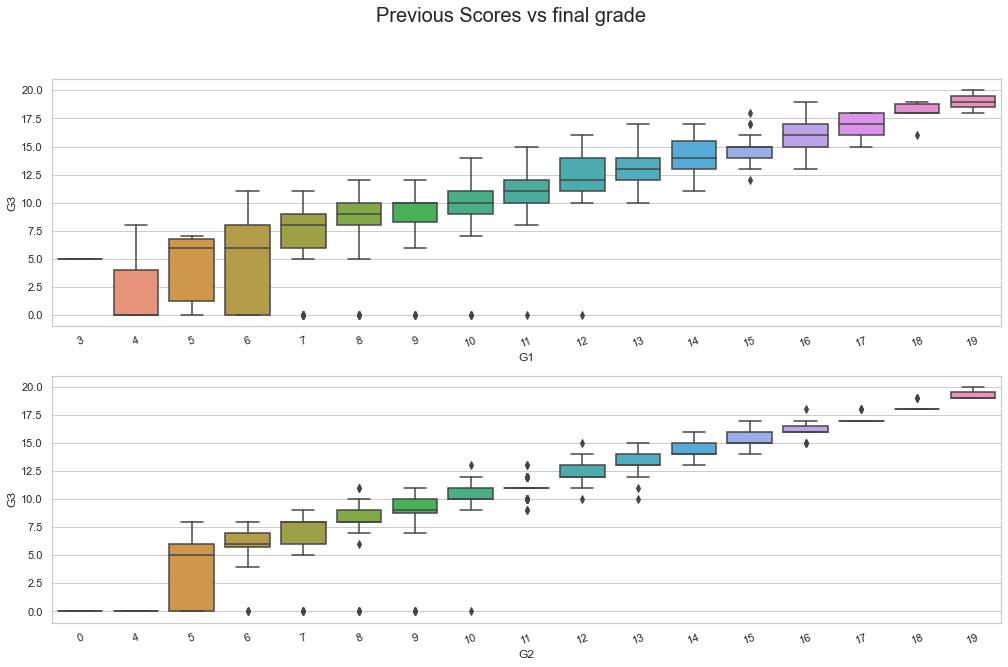

In [36]:
y_cols = ['G3']
x_cols = [ 'G1','G2']
boxpl(studentDataSet, x_cols, y_cols,'Previous Scores vs final grade')
plt.show()

High alcoholic females and less alcoholic males acquire good scores.

# Reason of selecting school

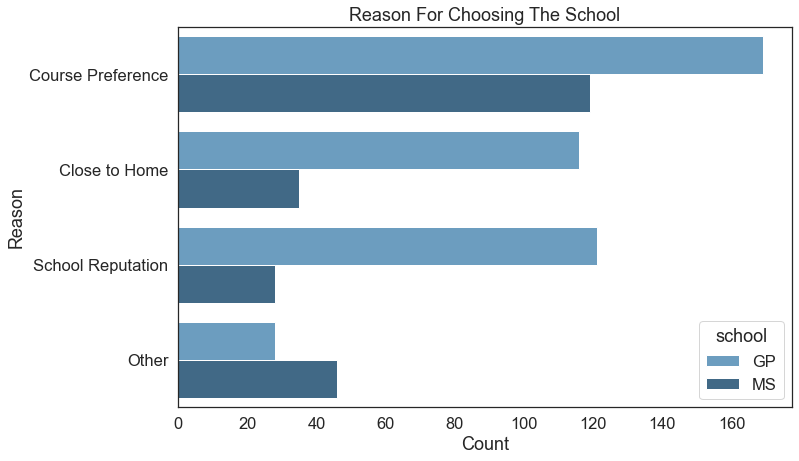

In [37]:
plt.figure(figsize=(11,7))
sns.set(font_scale=1.5)
sns.set_style('white')

ax = sns.countplot(y='reason',data=studentDataSet, order=studentDataSet['reason'].value_counts().index, hue='school', palette="Blues_d")

ax.set_yticklabels(('Course Preference', 'Close to Home', 'School Reputation', 'Other'))
plt.ylabel('Reason')
plt.xlabel('Count')
plt.title('Reason For Choosing The School')
plt.show()

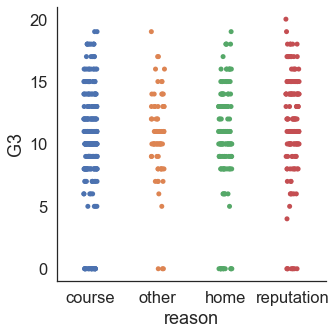

In [38]:
sns.catplot(x="reason", y="G3", data=studentDataSet)
plt.show()

Observation : The students have an equally distributed average score when it comes to reason attribute.

# Relation with the study time and travelling time

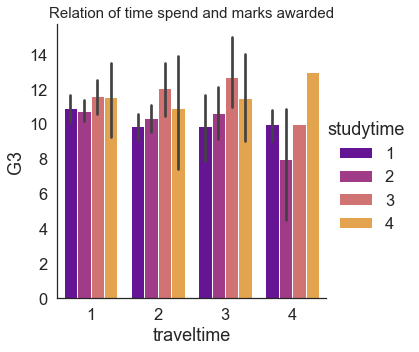

In [39]:
sns.catplot(x='traveltime',y='G3',data=studentDataSet,kind="bar",hue='studytime',palette='plasma')
plt.title('Relation of time spend and marks awarded', fontdict={'fontname':'arial', 'fontsize':15})
plt.show()

The grade awarded have negative impacts on the grade warded. But we can find out that the students who spends more time on studies can achieve high marks eventhough they have high travel time.

Early Education and Future educationPlan

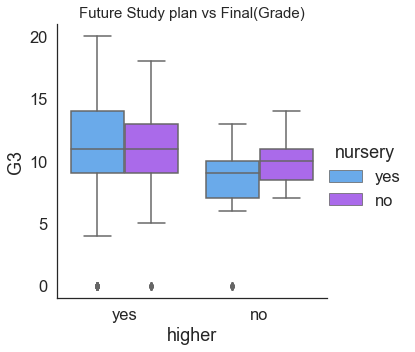

In [40]:
sns.catplot(x='higher',y='G3',data=studentDataSet,kind="box",hue='nursery',palette='cool')
plt.title('Future Study plan vs Final(Grade)', fontdict={'fontname':'arial', 'fontsize':15})
plt.show()

Early education does not have much effects on the score awarded but their future study plan have very high impacts on the score.
The students who are intented to so a higher education is achieving very high score.

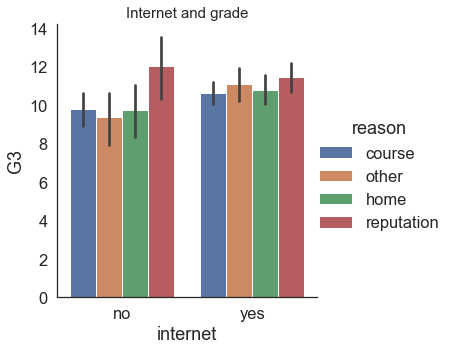

In [41]:
sns.catplot(x='internet',y='G3',data=studentDataSet,kind="bar",hue='reason',palette='deep')
plt.title('Internet and grade', fontdict={'fontname':'arial', 'fontsize':15})
plt.show()

# Relation with their Social Life

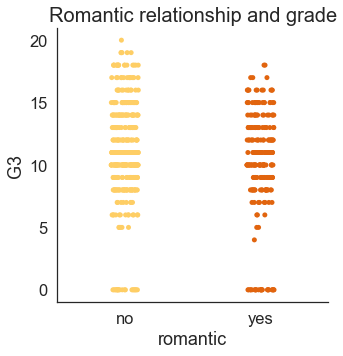

In [42]:
sns.catplot(x='romantic',y='G3',data=studentDataSet,kind="strip",palette='YlOrBr', hue_order=["small", "big"])
plt.title('Romantic relationship and grade', fontdict={'fontname':'arial', 'fontsize':20})
plt.show()

Observation : Students with no romantic relationship score higher

# Going out with friends

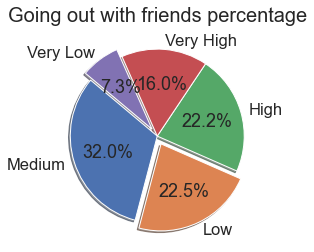

In [47]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Medium','Low','High','Very High','Very Low'
sizes = studentDataSet['goout'].value_counts()
explode = (0, 0.1, 0, 0,0.1)  # "explode" the 2nd and 5th slice

plt.pie(sizes, explode=explode, labels=labels, 
autopct='%1.1f%%', shadow=True, startangle=140) # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Going out with friends percentage',fontdict={'fontname':'arial', 'fontsize':20})
plt.show()

Observation : The students have an average score when it comes to going out with friends.

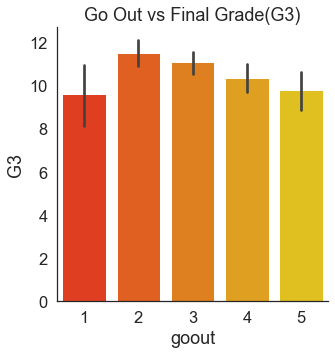

In [48]:
sns.catplot(x='goout',y='G3',data=studentDataSet,kind="bar",palette='autumn')
plt.title('Go Out vs Final Grade(G3)')
plt.show()

Observation : Students who go out a lot score less

# Alcohol consumption

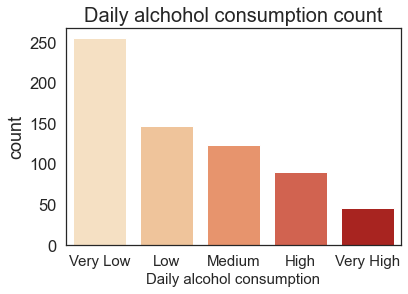

In [49]:
b = sns.countplot(x=studentDataSet['Walc'],palette='OrRd')
labels = 'Very Low','Low','Medium','High','Very High'
b.set_title('Daily alchohol consumption count',fontdict={'fontname':'arial', 'fontsize':20})
b.set_xticklabels(labels,fontdict={'fontname':'arial', 'fontsize':15})
b.set_xlabel('Daily alcohol consumption',fontdict={'fontname':'arial', 'fontsize':15})
plt.show()

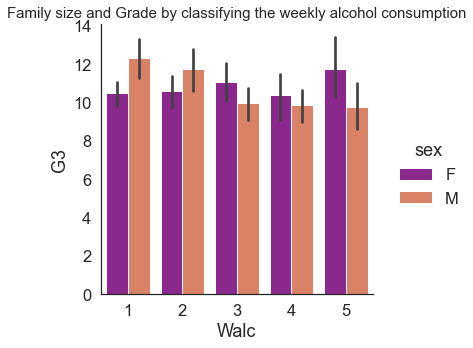

In [50]:
sns.catplot(x='Walc',y='G3',data=studentDataSet,kind='bar',hue='sex',palette='plasma')
plt.title('Family size and Grade by classifying the weekly alcohol consumption', fontdict={'fontname':'arial', 'fontsize':15})
plt.show()

When considering the weekly alcohol consumption, the less alcohol used students achieve high score than other  students. But when considering gender, the high alcohol used females achieving high score than the female students who consume less alcohol.

# Health of the student

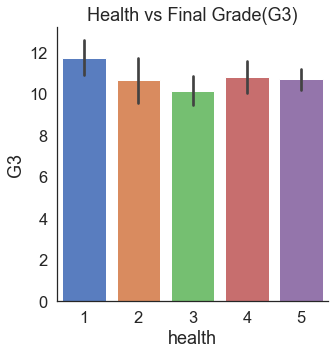

In [51]:
sns.catplot(x='health',y='G3',data=studentDataSet,kind="bar",palette='muted')
plt.title('Health vs Final Grade(G3)')
plt.show()
# current health status (numeric: from 1 - very bad to 5 - very good) 

The students with very bad health conditions score better score

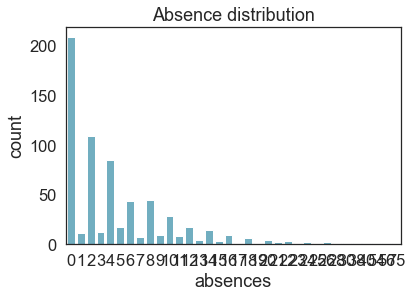

In [52]:
# sns.countplot(x=studentDataSet['absences'],palette='pastel')
sns.countplot(x="absences", data=studentDataSet, color="c")
plt.title('Absence distribution')
plt.show()

Absence rate are not very high. About 320 students does not taken any leaves.

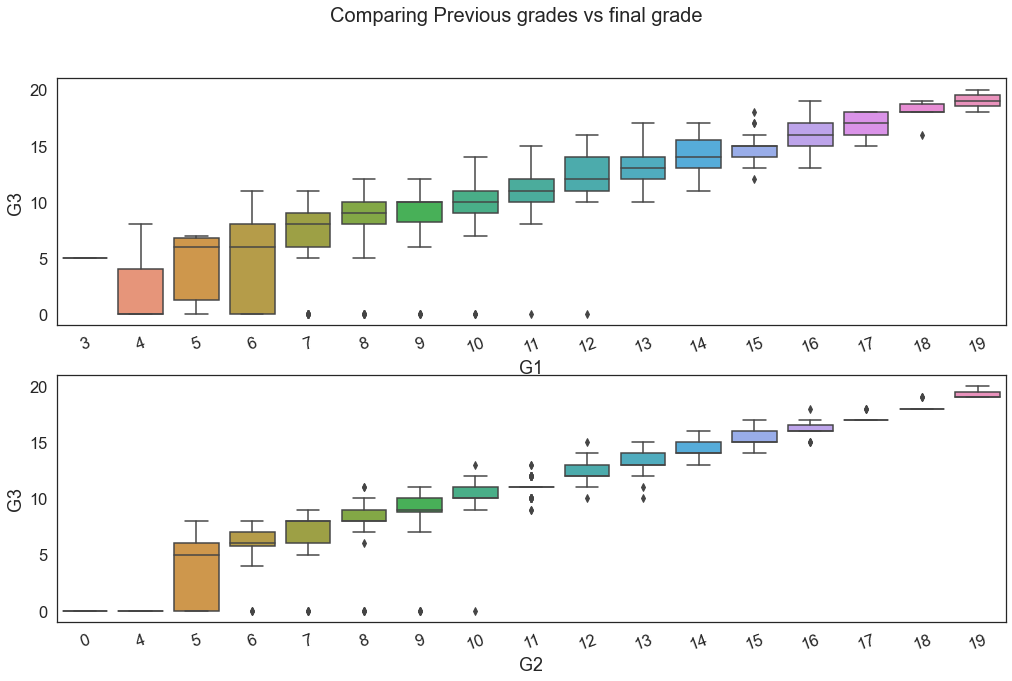

In [53]:
y_cols = ['G3']
x_cols = ['G1', 'G2']
boxpl(studentDataSet, x_cols, y_cols,'Comparing Previous grades vs final grade')

The G1 and G3 directly propotional to G3. The students have high previous grade score good marks in final grade too.

# Correlation

G3            1.000000
G2            0.913548
G1            0.796569
Medu          0.182611
Fedu          0.137159
studytime     0.097863
famrel        0.061296
absences     -0.004601
health       -0.047812
freetime     -0.058860
traveltime   -0.073488
Dalc         -0.075212
goout        -0.081691
Walc         -0.084689
age          -0.127446
failures     -0.359377
Name: G3, dtype: float64 




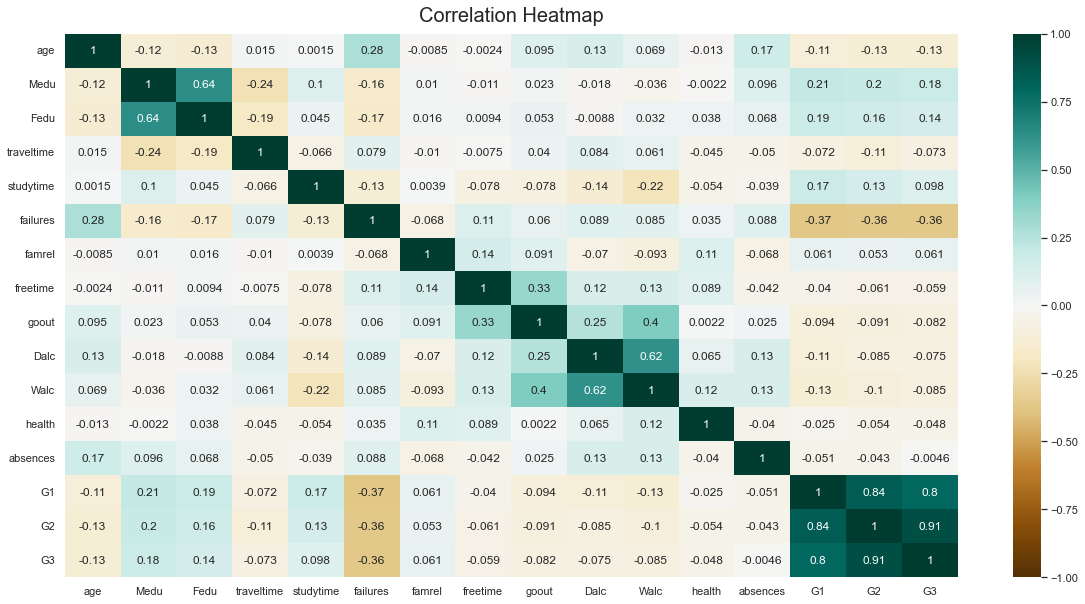

In [14]:
#Checking correlation between the class/target and the features
def checkCorrelation(studentDataSet):
    corr_matrix = studentDataSet.corr()
    print(corr_matrix["G3"].sort_values(ascending=False),"\n\n")
    # Set size of heatmap
    plt.figure(figsize=(20, 10)) 
    # Store heatmap object in a variable to easily access it.
    # Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
    heatmap = sns.heatmap(studentDataSet.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
    # Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
    heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':20}, pad=12);
    #Save the heatmap for further usage
    plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')
    
checkCorrelation(studentDataSet)